#We are trying to perform diabetes prediction

Data dictionary

- Pregnancies: Number of times pregnant

- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

- BloodPressur: Diastolic blood pressure (mm Hg)

- SkinThickness: Triceps skin fold thickness (mm)

- Insulin: 2 - Hour serum insulin (mu U/ml)

- BMI: Body mass index (weight in kg/(height in m)2)

- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

- Age: Age in years

- Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [ ]:
#Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import KNNImputer

import xgboost as xgb
from xgboost import XGBClassifier

from google.colab import drive
drive.mount("/content/gdrive/")

import os
os.chdir("/content/gdrive/My Drive/Startup Projects/Medical (Democratize)/People/Diabetes-Data/Diabetes Prediction/Pima/Data/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
diabetes = pd.read_csv("diabetes.csv")

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
for column in diabetes:
  print(diabetes[column].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22 

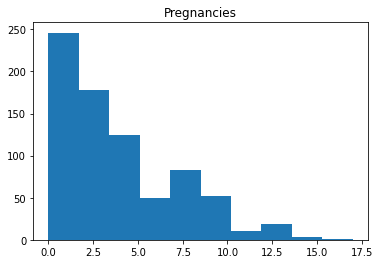

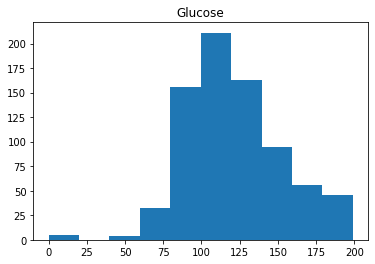

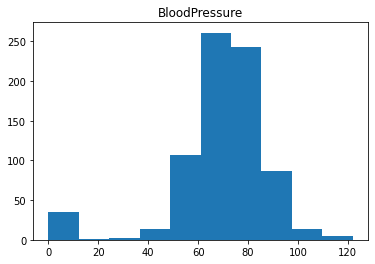

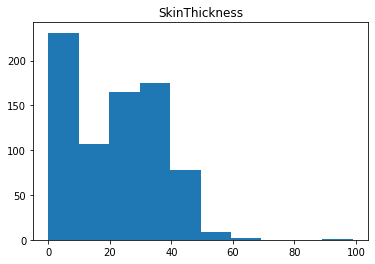

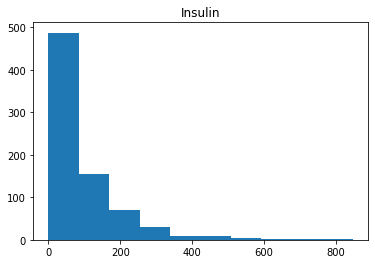

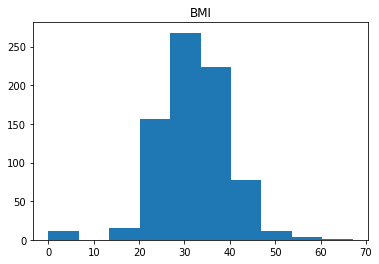

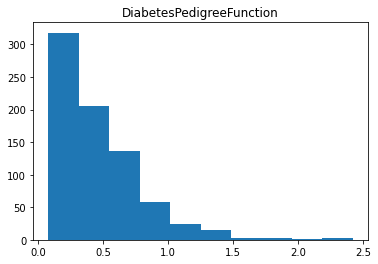

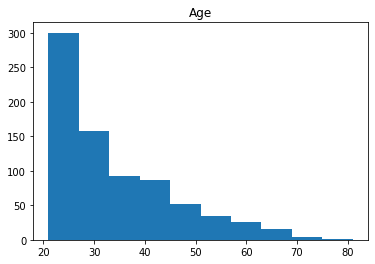

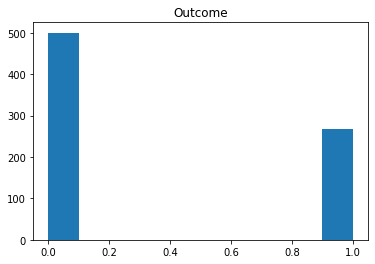

In [ ]:
for i in diabetes:
  plt.hist(diabetes[i])
  plt.title(i)
  plt.show()

In [ ]:
diabetes_copy = diabetes

In [ ]:
diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def check_df(dataframe):
  print("#################### Shape #####################")
  print(dataframe.shape)
  print("#################### Types #####################")
  print(dataframe.dtypes)
  print("#################### Head #####################")
  print(dataframe.head())
  print("#################### Tail #####################")
  print(dataframe.tail())
  print("#################### NA #####################")
  print(dataframe.isnull().sum())
  print("#################### Quantiles #####################")
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(diabetes_copy)

#################### Shape #####################
(768, 9)
#################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
#################### Head #####################
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5

In [ ]:
diabetes_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#EDA

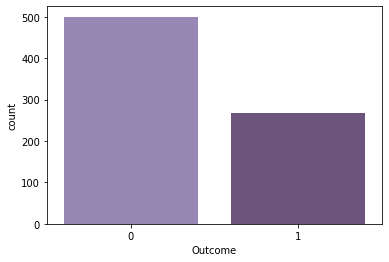

In [ ]:
sns.countplot(x = "Outcome", data = diabetes_copy, palette = ("BuPu_d"))

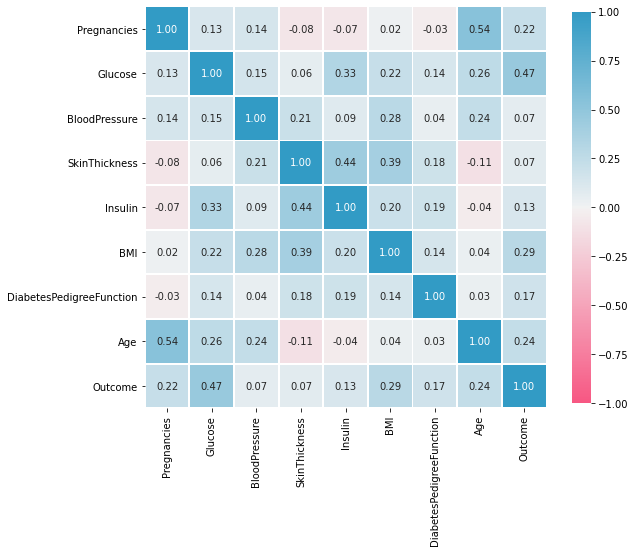

In [ ]:
plt.figure(figsize = (9, 9))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)
sns.heatmap(diabetes_copy.corr(), cmap = cmap, vmin = -1, vmax = 1, cbar_kws = {"shrink": .8}, square = True, annot = True, fmt = ".2f", linewidths = .8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

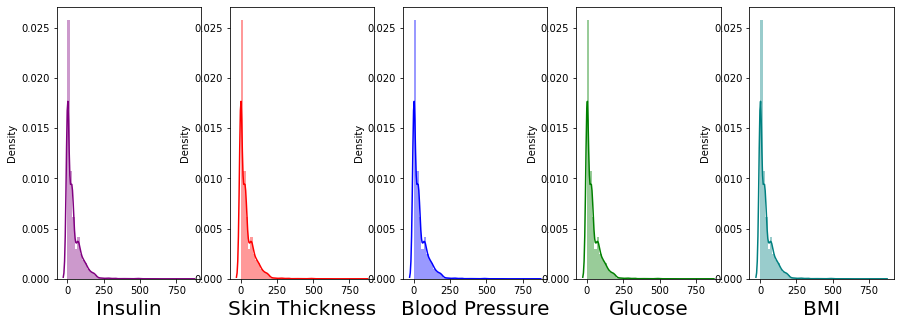

In [ ]:
def column_dplots():
  fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))

  ax[0].set_xlabel("Insulin", fontsize = 20)
  sns.distplot(diabetes_copy, ax = ax[0], color = "purple")

  ax[1].set_xlabel("Skin Thickness", fontsize = 20)
  sns.distplot(diabetes_copy, ax = ax[1], color = "red")

  ax[2].set_xlabel("Blood Pressure", fontsize = 20)
  sns.distplot(diabetes_copy, ax = ax[2], color = "blue")

  ax[3].set_xlabel("Glucose", fontsize = 20)
  sns.distplot(diabetes_copy, ax = ax[3], color = "green")

  ax[4].set_xlabel("BMI", fontsize = 20)
  sns.distplot(diabetes_copy, ax = ax[4], color = "teal")

  plt.show()

column_dplots()

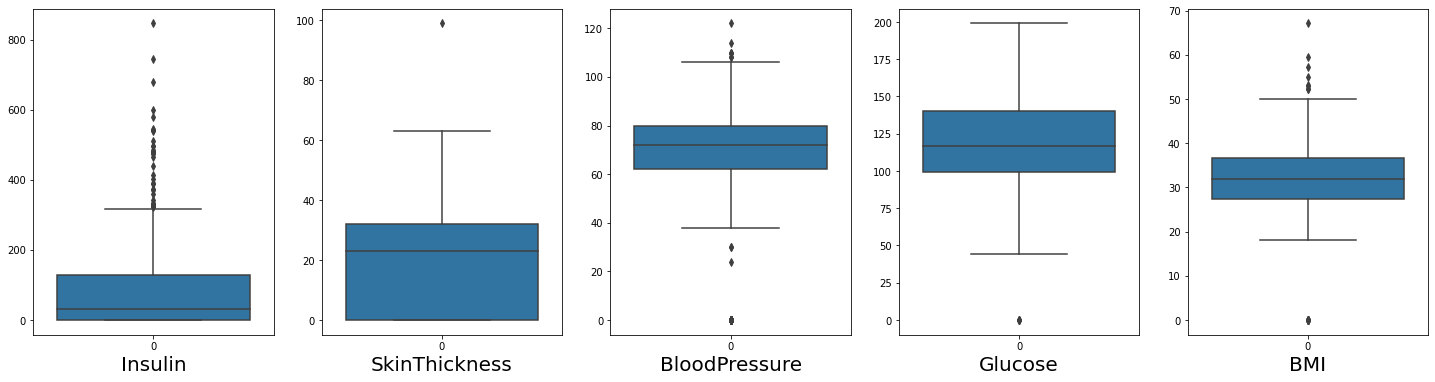

In [ ]:
def outlier_plots():
  f, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 6))
  
  sns.boxplot(data = diabetes_copy.Insulin, ax = ax[0])
  ax[0].set_xlabel("Insulin", fontsize = 20)

  sns.boxplot(data = diabetes_copy.SkinThickness, ax = ax[1])
  ax[1].set_xlabel("SkinThickness", fontsize = 20)

  sns.boxplot(data = diabetes_copy.BloodPressure, ax = ax[2])
  ax[2].set_xlabel("BloodPressure", fontsize = 20)

  sns.boxplot(data = diabetes_copy.Glucose, ax = ax[3])
  ax[3].set_xlabel("Glucose", fontsize = 20)

  sns.boxplot(data = diabetes_copy.BMI, ax = ax[4])
  ax[4].set_xlabel("BMI", fontsize = 20)

outlier_plots()

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]

  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_cat: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")
  print(f"categoric: {cat_cols}, cat_but_car: {cat_but_car}, numeric: {num_cols}, num_but_cat: {num_but_cat}")

  return cat_cols, cat_but_car, num_cols, num_but_cat

In [ ]:
grab_col_names(diabetes_copy)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_cat: 0
num_but_cat: 1
categoric: ['Outcome'], cat_but_car: [], numeric: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], num_but_cat: ['Outcome']


(['Outcome'],
 [],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 ['Outcome'])

In [ ]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(diabetes_copy)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_cat: 0
num_but_cat: 1
categoric: ['Outcome'], cat_but_car: [], numeric: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], num_but_cat: ['Outcome']


In [ ]:
zero_list = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

[diabetes_copy[col].replace(0, np.NaN, inplace = True) for col in diabetes_copy[zero_list]]

[None, None, None, None, None]

In [ ]:
diabetes_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
diabetes_copy.BloodPressure = diabetes_copy.BloodPressure.fillna(diabetes_copy.BloodPressure.mean())
diabetes_copy.Insulin = diabetes_copy.Insulin.fillna(diabetes_copy.Insulin.median())
diabetes_copy.Glucose = diabetes_copy.fillna(diabetes_copy.Glucose.mean())

In [ ]:
imputer = KNNImputer(n_neighbors = 5, weights = "uniform", metric = "nan_euclidean")

diabetes_copy[["BMI", "SkinThickness"]] = imputer.fit_transform(diabetes_copy[["BMI", "SkinThickness"]])

In [ ]:
diabetes_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,6.0,155.548223,35.0,125.0,33.6,0.627,50,1
1,1,1.0,155.548223,29.0,125.0,26.6,0.351,31,0
2,8,8.0,155.548223,16.8,125.0,23.3,0.672,32,1
3,1,1.0,94.000000,23.0,94.0,28.1,0.167,21,0
4,0,0.0,168.000000,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,10.0,180.000000,48.0,180.0,32.9,0.171,63,0
764,2,2.0,155.548223,27.0,125.0,36.8,0.340,27,0
765,5,5.0,112.000000,23.0,112.0,26.2,0.245,30,0
766,1,1.0,155.548223,28.6,125.0,30.1,0.349,47,1


In [ ]:
diabetes_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

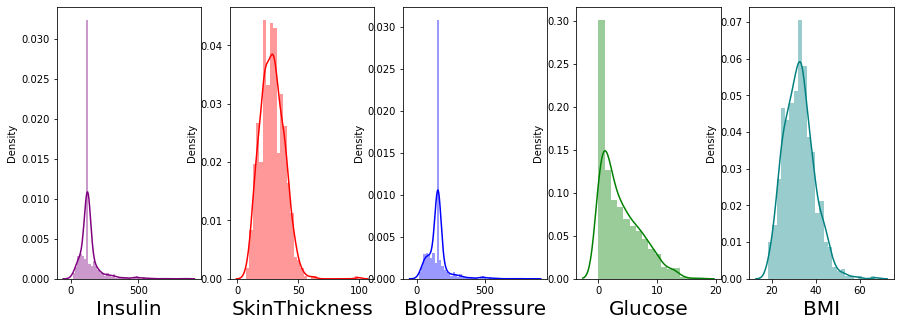

In [ ]:
def column_dplots():
  fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))

  ax[0].set_xlabel("Insulin", fontsize = 20)
  sns.distplot(diabetes_copy.Insulin, ax = ax[0], color = "purple")

  ax[1].set_xlabel("Skin Thickness", fontsize = 20)
  sns.distplot(diabetes_copy.SkinThickness, ax = ax[1], color = "red")

  ax[2].set_xlabel("Blood Pressure", fontsize = 20)
  sns.distplot(diabetes_copy.BloodPressure, ax = ax[2], color = "blue")

  ax[3].set_xlabel("Glucose", fontsize = 20)
  sns.distplot(diabetes_copy.Glucose, ax = ax[3], color = "green")

  ax[4].set_xlabel("BMI", fontsize = 20)
  sns.distplot(diabetes_copy.BMI, ax = ax[4], color = "teal")

  plt.show()

column_dplots()

In [ ]:
def outlier_analysis(dataframe, numerical_columns):
  df_without_outliers = diabetes_copy.copy()
  outlier_boundaries_dict = {}
  for col in numerical_columns:
    print(f"------{col}-------")
    lower_limit = dataframe[col].quantile(q = 0.01)
    upper_limit = dataframe[col].quantile(q = 0.99)

    number_of_outliers = len(dataframe[(dataframe[col] < lower_limit) | dataframe[col] > upper_limit])
    if number_of_outliers > 0:
      print(f"{number_of_outliers} outliers are found for {col} features")

      outlier_boundaries_dict.update({col: (lower_limit, upper_limit)})
      df_without_outliers.loc[diabetes_copy[col] < lower_limit, col] = lower_limit
      df_without_outliers.loc[diabetes_copy[col] > upper_limit, col] = upper_limit

  return df_without_outliers, outlier_boundaries_dict

In [ ]:
outlier_analysis(diabetes_copy, num_cols)

------Pregnancies-------
------Glucose-------
------BloodPressure-------
------SkinThickness-------
------Insulin-------
------BMI-------
------DiabetesPedigreeFunction-------
------Age-------


(     Pregnancies  Glucose  ...  Age  Outcome
 0              6      6.0  ...   50        1
 1              1      1.0  ...   31        0
 2              8      8.0  ...   32        1
 3              1      1.0  ...   21        0
 4              0      0.0  ...   33        1
 ..           ...      ...  ...  ...      ...
 763           10     10.0  ...   63        0
 764            2      2.0  ...   27        0
 765            5      5.0  ...   30        0
 766            1      1.0  ...   47        1
 767            1      1.0  ...   23        0
 
 [768 rows x 9 columns], {})